# The df.pivot() method draft:

This project is made for exercise purpose only:
- We will paste all codes and descriptions from `Data Quest` mission without any change. It is taken from the lesson: [Transforming Data With Pandas](https://app.dataquest.io/m/345/transforming-data-with-pandas/1/introduction). This part will be named here: **"Preparing data for df.pivot() method"**
- The main part of our craft here will start when our `DataFrame` will be formatted as tidy data with `Series.map()`, `Series.apply()`, `DataFrame.apply()`, and `DataFrame.applymap()` methods along with the `pd.melt()` function. This part will be named here: **"Working with df.pivot() method"**


## BUT !!! It's not all !!!
When we were working on this project once again a big issue arises. It's an issue we experience almost from the beginning of our programmer learning path. Every time when we pasted our code on the DataQuest forum that included any pictures, they won't be displayed when someone just clicks on the project. The only way to display pictures was: do download the whole project with all files. At this point, it's no more a problem. 

We want to focus here just on the `df.pivot()` method. Because of that please skip the first code cell below. **We will explain our "picture" function in another topic. A link to this topic is: [get_gif_n_image()](https://community.dataquest.io/t/i-want-to-introduce-get-gif-n-image-function/552353)**

In [1]:
# The code below was written by Paweł Pedryc.
# For non-commercial use only. If you need it for anything commercial, please contact me first. 
# If you want to know more,
# or want to ask about anything please write at pawel.pedryc@gmail.com
# The discussion abot this code is happening here: 

# Download file into Jupyter Notebook:
''' isntalling the wget library https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/ '''
! pip install wget 
# more about wget here: https://pypi.org/project/wget/
import wget # we need to install this via console command: pip install wget

# Convert svg to png:
# https://stackoverflow.com/questions/6589358/convert-svg-to-png-in-python
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM

# Removing files from folder:
import os

# Searching for files:
import glob 

# Display PNG:
    
from IPython.display import Image, display

# Needed for display log with the error exeption function:
# https://realpython.com/the-most-diabolical-python-antipattern/
import logging

# Adding jpeg and jpg:
# https://stackoverflow.com/questions/13137817/how-to-download-image-using-requests

import requests
import shutil

# Counter needed for distinguish between files with the same name:
from collections import Counter

# Needed for saving dictionaries
# https://realpython.com/python-json/#a-very-brief-history-of-json
import json

# Checking if file exist
# https://linuxize.com/post/python-check-if-file-exists/
import os.path



def get_gif_n_image(link, file_name_show=False, dict_appearance=False, show_error_logs=False, only_picture_name=False):
    """
    Function get_gif_n_image will take any image (jpg, jpeg, png and svg),
    or gif, from the link that opens this object in the browser. After that,
    it will be saved in the current folder, convert (if needed) to png (from svg format)
    and - finally - displayed. The function will delate svg file after conversion. 
    In that case, it will live only png version, so, there won't be any garbage 
    in folder. 
    """
    
    """Working with link string"""
    
###################### .gif, .png, .svg, .webp files process below: ################################   

    if (
        link.rfind('.gif') != -1 
        or link.rfind('.png') != -1
        or link.rfind('.svg') != -1 
        or link.rfind('.webp') != -1):  # '-1' means that 'rfind()' didn't find match: https://www.programiz.com/python-programming/methods/string/find
    
        # 'File name' search:

        file_name_start = link.rfind('/')
        file_name_type = link.rfind('.')
        file_name = link[file_name_start+1 : file_name_type]
#         # Test:
#         print('file_name:', file_name)

        # 'File type' search:
        image_type_index_start = link.rfind('.')
        if '.gif' or '.png' or '.svg' in link:
            image_type_index_dot = link[image_type_index_start : image_type_index_start + 4]
            image_type_index = link[image_type_index_start + 1 : image_type_index_start + 4]
        elif '.webp' in link:
            image_type_index_dot = link[image_type_index_start : image_type_index_start + 5]
            image_type_index = link[image_type_index_start + 1 : image_type_index_start + 5]
#         # Test:
#         print('image_type_index:', image_type_index)

        # 'File name' with "file type" string:
        file_name_and_type = file_name + image_type_index_dot        
#         # Test:
#         print('file_name_and_type:', file_name_and_type)
        
        
        """
            ###  THE DICTIONARY GENERATION MODULE ###
            
        Because we don't know is the name from a link is unique or not,
        we need to build a dictionary which will match
        the link's name and the name of a generated file in the current folder.

        An example of this situation is when we try to use get_gif_n_image on this site:
        https://media.giphy.com

        Every gif here has the same name. Two different gifs below:
        https://media.giphy.com/media/q1MeAPDDMb43K/giphy.gif
        https://media.giphy.com/media/13CoXDiaCcCoyk/giphy.gif
        
        Every time we call our main fuction 'get_gif_n_image' 
        (let's suppose we call it twice, for those links above), 
        the names for files in current folder will be:

        https://media.giphy.com/media/q1MeAPDDMb43K/giphy.gif -> file_name -> 'giphy.gif'
        https://media.giphy.com/media/13CoXDiaCcCoyk/giphy.gif -> file_name -> 'giphy (1).gif'

        BUT, our 'file_name' + 'image_type_index_dot' object will see each link as:
        https://media.giphy.com/media/q1MeAPDDMb43K/giphy.gif -> 'file_name' + 'image_type_index_dot' = 'giphy.gif'
        https://media.giphy.com/media/13CoXDiaCcCoyk/giphy.gif -> 'file_name' + 'image_type_index_dot' = 'giphy.gif'

        Python record both, but it will rename second as: 'giphy (1).gif; in current folder. 
        The problem is: our code detects name as 'giphy.gif' in link every time. 
        We need to fix it, so the relation between 'file_name' object and links will be
        with logic:
        
        https://media.giphy.com/media/q1MeAPDDMb43K/giphy.gif -> 'file_name' + 'image_type_index_dot' = 'giphy.gif'
        https://media.giphy.com/media/13CoXDiaCcCoyk/giphy.gif -> 'file_name' + 'image_type_index_dot' = 'giphy (1).gif'
        

        We will build a dictionary that will be a separate file (json format). 
        It will store data that will archive every use of our 'get_gif_n_image' function.
        It will be open and checked every time the main function : get_gif_n_image - will be called.
        
        If the probem described above will appear, it will fix it
        """
        # check if the dictionary: 'dict_for_links' exist. If so: open it:
        # https://realpython.com/python-json/#a-very-brief-history-of-json
        try:
            a_file = open("dict_for_links.json", "r")

            dict_for_links = json.load(a_file)
            # Test:
            if dict_appearance == True:
                print("dict_for_links first appearance (try):", dict_for_links)

            # The first thing we need to do is to add 'name_counter' key to the dictionary.
            # It will count instances of same name accured in the function:
            if (file_name in dict_for_links) and (link not in dict_for_links):
                dict_for_links[file_name] += 1
                
                # dict_for_links: {'giphy': '', 'https://media.giphy.com/media/q1MeAPDDMb43K/giphy.gif': 'giphy'}
                # If the name[key] (for ex. 'giphy.gif') exist in `dict_for_links` and it has value >= 1 
                # like 'giphy (1).gif' then in link[key] we rename string value from
                # 'giphy.gif' to 'giphy (1).gif':
                dict_for_links[link] = file_name + ' (' + str(dict_for_links[file_name]) + ')'
                
            else:
    #             # If the file_name wasn't present in dict the name is without number ( value will be: 0).
    #             # For ex. if we have link with 'file_name': "giphy.gif", then first apperance is:
    #             # "giphy.gif". Next one should be written as "giphy.gif (1) in dictionary"
                dict_for_links[file_name] = 0 
                dict_for_links[link] = file_name # first link can have the same name
            
        except Exception as e:
            if show_error_logs == True:
                logging.exception('Caught an error [in code used: except Exception]: no file in current folder.' + str(e))
                print('Caught an error [in code used: except Exception]: no file in current folder.')
            
            dict_for_links = {} # there was no dict so we create one
            dict_for_links[file_name] = 0 
            dict_for_links[link] = file_name # first link can have the same name
            if dict_appearance == True:
                print('dict_for_links first appearance (with exception error):', dict_for_links)
                
        else:

            # load it back again:
            a_file = open("dict_for_links.json", "r")

            dict_for_links = json.load(a_file)
            # Test:
            if dict_appearance == True:
                print("dict_for_links first appearance (else):", dict_for_links)
#             # Test:
#             print("dict_for_links:", dict_for_links)

        # The first thing we need to do is to add 'name_counter' key to the dictionary.
        # It will count instances of same name accured in function
        if (file_name in dict_for_links) and (link not in dict_for_links):
            dict_for_links[file_name] += 1

            # dict_for_links: {'giphy': '', 'https://media.giphy.com/media/q1MeAPDDMb43K/giphy.gif': 'giphy'}
            # If the name[key] (for ex. 'giphy.gif') exist in `dict_for_links` and it has value >= 1 
            # like 'giphy (1).gif' then in link[key] we rename string value from
            # 'giphy.gif' to 'giphy (1).gif':

            dict_for_links[link] = file_name + ' (' + str(dict_for_links[file_name]) + ')'
        
        # rename 'file_name' object when there are many similar like 'giphy (1).gif':
        if link in dict_for_links:
            file_name = dict_for_links[link]
            file_name_and_type = file_name + image_type_index_dot


        # Find the file - if possible:
        try:
            """
            Link proper name of the file in current folder when
            there are many files with the same name 
            and system add (num) at the end of the file name
            """
            # Checking if file exist
            # https://linuxize.com/post/python-check-if-file-exists/
            if os.path.isfile(file_name_and_type) == False:
                wget.download(link)
                active_link_or_file_exist = True
            """
            If there is a file in current folder than we can use 'active_link_or_file_exist'. 
            It will be needed for "get_gif_n_image"'s arg: 'only_picture_name':
            """
            if os.path.isfile(file_name_and_type) == True:
                active_link_or_file_exist = True
        except Exception as e:
            if os.path.isfile(file_name_and_type) == True:
                active_link_or_file_exist = True
            if show_error_logs == True:
                logging.exception('Caught an error [in code used: except Exception]: no image in current folder, or active link from web (with image), or both.' + str(e))
                print('Caught an error [in code used: except Exception]: no image in current folder, or active link from web (with image), or both.')
        except OSError as ose:
            if os.path.isfile(file_name_and_type) == True:
                active_link_or_file_exist = True
            if show_error_logs == True:
                logging.exception('Caught an error [in code used: except OSError]: no image in current folder, or active link from web (with image), or both.' + str(ose))
                print('Caught an error [in code used: except OSError]: no image in current folder, or active link from web (with image), or both.')
        else:
            # Checking if file exist
            # https://linuxize.com/post/python-check-if-file-exists/
            if os.path.isfile(file_name_and_type) == False:
                wget.download(link)
                active_link_or_file_exist = True
            if os.path.isfile(file_name_and_type) == True:
                active_link_or_file_exist = True
          
        finally:
# #             Test:
#             print('file_name_and_type:', file_name_and_type)
#             Test:
            if dict_appearance == True:
                print('dict_for_links second appearance (in finnaly statement):', dict_for_links)
            
            """Converting svg and webp file type - if it happend"""
            if active_link_or_file_exist == True and (image_type_index == 'svg' or image_type_index == 'webp'):
#                 try:
                # https://stackoverflow.com/questions/6589358/convert-svg-to-png-in-python
                # Convert svg to png:
                drawing = svg2rlg(file_name_and_type)
                png = ".png"
                renderPM.drawToFile(drawing, file_name + png, fmt="PNG")

                # Removing svg file from folder:
                """
                We don't need two formats of the file_name. 
                So, we remove old one, 
                so there will be less garbage in folder.
                """
                os.remove(file_name_and_type)
                file_name_and_type = file_name + '.png'
#                 # Test:
#                 print('The new file name and type:', file_name_and_type)


        # Return file name:
            # Checking if file exist
            # https://linuxize.com/post/python-check-if-file-exists/        
            if file_name_show == True and os.path.isfile(file_name_and_type) == True:
                print(file_name_and_type)

            if only_picture_name == True and os.path.isfile(file_name_and_type) == True:
                print(file_name_and_type)

                
            # Display pictures from the current folder:
            # Searching for file match in current folder, more about here:
            # https://stackoverflow.com/questions/58399676/how-to-create-an-if-statement-in-python-when-working-with-files
            # We set a current directory.
            directory = '.'
            choices = glob.glob(os.path.join(directory, '{prefix}*.*'.format(prefix = file_name)))
            
            if only_picture_name == False and any(choices):
                name_proper_format_list = choices

                for string in name_proper_format_list:
                    name_proper_format = string[2:]
                # https://stackoverflow.com/questions/35145509/why-is-ipython-display-image-not-showing-in-output
                i = Image(name_proper_format)
                display(i)

            else:
                pass
#                 # Test:
#                 print('name_proper_format:', name_proper_format)
                
        # Saving dictionary in current folder: 
        # https://realpython.com/python-json/#a-very-brief-history-of-json
        with open("dict_for_links.json", "w") as write_file:
            # https://www.geeksforgeeks.org/json-dump-in-python/
            json.dump(dict_for_links, write_file)
            write_file.close()

###################### .jpeg and .jpg files process below: ################################


    elif link.rfind('.jpeg') != -1 or link.rfind('.jpg') != -1: # '-1' means that 'rfind()' didn't find match: https://www.programiz.com/python-programming/methods/string/find

        # 'File name' search:
        file_name_start = link.rfind('/')
        file_name_type = link.rfind('.')
        file_name = link[file_name_start+1 : file_name_type]
#         # Test:
#         print('file_name:', file_name)

        # 'File type' search:
        image_type_index_start = link.rfind('.')
        if link.rfind('.jpeg') != -1 and '.jpeg' in link:
            image_type_index_dot = link[image_type_index_start : image_type_index_start + 5]
            image_type_index = link[image_type_index_start + 1 : image_type_index_start + 5]
        elif link.rfind('.jpg') != -1 and '.jpg' in link:
            image_type_index_dot = link[image_type_index_start : image_type_index_start + 4]
            image_type_index = link[image_type_index_start + 1 : image_type_index_start + 4]
#         # Test:
#         print('image_type_index_dot:', image_type_index_dot)

        # 'File name' with "file type" string:
        file_name_and_type = file_name + image_type_index_dot
#         # Test:
#         print('file_name_and_type:', file_name_and_type)

        """
        This code check if a name of the file is duplicated in link.
        If it is so, function will return a name that is shorter.
        Else: It return string: file name + format
        """
        full_link_list = link.split('/')
        filtering_link_name = {}
        for name_x in full_link_list:
#         #Test:
        #     print(name_x)
            if file_name_and_type.find(name_x) != -1 and name_x.find('.') != -1:
                filtering_link_name[name_x] = len(name_x)
                """
                If we have two instances of file name,
                than we have to set shorter as file name
                """
                if len(filtering_link_name) > 1:
                    file_name_and_type = min(
                        filtering_link_name,
                        key=filtering_link_name.get)
                else:
                    pass
                          
        try:
            # Try to download file if it doesn't exist in current folder.
            # It will save time if file for download is big and not needed:
            directory = '.'
            file_path = glob.glob(os.path.join(directory, '{prefix}'.format(prefix = file_name_and_type)))
            if not any(file_path):
                r = requests.get(link,
                                 stream=True, headers={'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64)' 
                                      'AppleWebKit/537.11 (KHTML, like Gecko)'
                                      'Chrome/23.0.1271.64 Safari/537.11',
                        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
                        'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
                        'Accept-Encoding': 'none',
                        'Accept-Language': 'en-US,en;q=0.8',
                        'Connection': 'keep-alive'}) # We added all user-agents for avoiding error 403

                # Open picture's file:
                if r.status_code == 200:
                    with open(str(file_name_and_type), 'wb') as f:
                        r.raw.decode_content = True
                        shutil.copyfileobj(r.raw, f)
        
        except Exception as e:
            if show_error_logs == True:
                logging.exception('Caught an error [in code used: except Exception]: no image in current folder, or active link from web (with image), or both.' + str(e))
                print('No active link.')

        else:
            # Try to download file if it doesn't exist in current folder:
            directory = '.'
            c = glob.glob(os.path.join(directory, '{prefix}'.format(prefix = file_name_and_type)))
            if not any(c):
                r = requests.get(link,
                                 stream=True, headers={'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64)' 
                                      'AppleWebKit/537.11 (KHTML, like Gecko)'
                                      'Chrome/23.0.1271.64 Safari/537.11',
                        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
                        'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
                        'Accept-Encoding': 'none',
                        'Accept-Language': 'en-US,en;q=0.8',
                        'Connection': 'keep-alive'}) # We added all user-agents for avoiding error 403

                # Open picture's file:
                if r.status_code == 200:
                    with open(str(file_name_and_type), 'wb') as f:
                        r.raw.decode_content = True
                        shutil.copyfileobj(r.raw, f)
        
        finally:
            try:
                if only_picture_name == False:
                    a = Image(file_name_and_type)
                    display(a)
            except Exception:
                print('File not found.')

            
        # Return file name:
            # Checking if file exist
            # https://linuxize.com/post/python-check-if-file-exists/        
        if file_name_show == True and os.path.isfile(file_name_and_type) == True:
            print(file_name_and_type)

        if only_picture_name == True and os.path.isfile(file_name_and_type) == True:
            print(file_name_and_type)

    
    else:
        print('Unknown file format or file not detected.')


## Preparing data for df.pivot() method:

In this mission, we'll continue working with [the World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness) and explore another aspect of it that we haven't analyzed yet - the factors that contribute to happiness. As a reminder, the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

You may recall from previous missions that each of the columns below contains the estimated extent to which each factor contributes to the happiness score:

- `Economy (GDP per Capita)`
- `Family`
- `Health (Life Expectancy)`
- `Freedom`
- `Trust (Government Corruption)`
- `Generosity`
Throughout this mission, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this mission:

Which of the factors above contribute the most to the happiness score?

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:

- `Series.map()`
- `Series.apply()`
- `DataFrame.applymap()`
- `DataFrame.apply()`
- `pd.melt()`

For teaching purposes, we'll focus just on the 2015 report in this mission. As a reminder, below are the first five rows of the data set:



<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Country</th>
<th>Region</th>
<th>Happiness Rank</th>
<th>Happiness Score</th>
<th>Standard Error</th>
<th>Economy (GDP per Capita)</th>
<th>Family</th>
<th>Health (Life Expectancy)</th>
<th>Freedom</th>
<th>Trust (Government Corruption)</th>
<th>Generosity</th>
<th>Dystopia Residual</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>Switzerland</td>
<td>Western Europe</td>
<td>1</td>
<td>7.587</td>
<td>0.03411</td>
<td>1.39651</td>
<td>1.34951</td>
<td>0.94143</td>
<td>0.66557</td>
<td>0.41978</td>
<td>0.29678</td>
<td>2.51738</td>
</tr>
<tr>
<th>1</th>
<td>Iceland</td>
<td>Western Europe</td>
<td>2</td>
<td>7.561</td>
<td>0.04884</td>
<td>1.30232</td>
<td>1.40223</td>
<td>0.94784</td>
<td>0.62877</td>
<td>0.14145</td>
<td>0.43630</td>
<td>2.70201</td>
</tr>
<tr>
<th>2</th>
<td>Denmark</td>
<td>Western Europe</td>
<td>3</td>
<td>7.527</td>
<td>0.03328</td>
<td>1.32548</td>
<td>1.36058</td>
<td>0.87464</td>
<td>0.64938</td>
<td>0.48357</td>
<td>0.34139</td>
<td>2.49204</td>
</tr>
<tr>
<th>3</th>
<td>Norway</td>
<td>Western Europe</td>
<td>4</td>
<td>7.522</td>
<td>0.03880</td>
<td>1.45900</td>
<td>1.33095</td>
<td>0.88521</td>
<td>0.66973</td>
<td>0.36503</td>
<td>0.34699</td>
<td>2.46531</td>
</tr>
<tr>
<th>4</th>
<td>Canada</td>
<td>North America</td>
<td>5</td>
<td>7.427</td>
<td>0.03553</td>
<td>1.32629</td>
<td>1.32261</td>
<td>0.90563</td>
<td>0.63297</td>
<td>0.32957</td>
<td>0.45811</td>
<td>2.45176</td>
</tr>
</tbody>
</table>

Below are descriptions for some of the other columns we'll work with in this mission:

- `Country` - Name of the country
- `Region` - Name of the region the country belongs to
- `Happiness Rank` - The rank of the country, as determined by its happiness score
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- `Dystopia Residual`- Represents the extent to which the factors above over or under explain the happiness score. Don't worry too much about this column - you won't need in depth knowledge of it to complete this mission.
Let's start by renaming some of the columns in `happiness2015`.

Instructions:

Recall that the 2015 World Happiness Report is saved to a variable named happiness2015. We also created a dictionary named mapping for renaming columns.

- Use the `DataFrame.rename()` method to change the `'Economy (GDP per Capita)'`, `'Health (Life Expectancy)'`, and `'Trust (Government Corruption)'` column names to the names specified in the mapping dictionary.
- Pass the `mapping` dictionary into the `df.rename()` method and set the `axis` parameter to `1`.
- Assign the result back to `happiness2015`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

wget.download('https://drive.google.com/file/d/1IZFXfnq8c_bA8rUmRGOJg9g3nnACqDAt/view?usp=sharing')

happiness2015 = pd.read_csv("World_Happiness_2015.csv")

mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapper=mapping, axis=1)

happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


When we reviewed `happiness2015` in the last screen, you may have noticed that each of the "factor" columns consists of numbers:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Country</th>
<th>Happiness Score</th>
<th>Economy</th>
<th>Family</th>
<th>Health</th>
<th>Freedom</th>
<th>Trust</th>
<th>Generosity</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>Switzerland</td>
<td>7.587</td>
<td>1.39651</td>
<td>1.34951</td>
<td>0.94143</td>
<td>0.66557</td>
<td>0.41978</td>
<td>0.29678</td>
</tr>
<tr>
<th>1</th>
<td>Iceland</td>
<td>7.561</td>
<td>1.30232</td>
<td>1.40223</td>
<td>0.94784</td>
<td>0.62877</td>
<td>0.14145</td>
<td>0.43630</td>
</tr>
<tr>
<th>2</th>
<td>Denmark</td>
<td>7.527</td>
<td>1.32548</td>
<td>1.36058</td>
<td>0.87464</td>
<td>0.64938</td>
<td>0.48357</td>
<td>0.34139</td>
</tr>
<tr>
<th>3</th>
<td>Norway</td>
<td>7.522</td>
<td>1.45900</td>
<td>1.33095</td>
<td>0.88521</td>
<td>0.66973</td>
<td>0.36503</td>
<td>0.34699</td>
</tr>
<tr>
<th>4</th>
<td>Canada</td>
<td>7.427</td>
<td>1.32629</td>
<td>1.32261</td>
<td>0.90563</td>
<td>0.63297</td>
<td>0.32957</td>
<td>0.45811</td>
</tr>
</tbody>
</table>

Recall that each number represents the extent to which each factor contributes to the happiness score.

However, not only is this definition a little hard to understand, but it can also be challenging to analyze all of these numbers across multiple columns. Instead, we can first convert these numbers to categories that indicate whether the factor has a high impact on the happiness score or a low impact using the following function:

```

def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
```
Although pandas provides many built-in functions for common data cleaning tasks, in this case, the tranformation we need to perform is so specific to our data that one doesn't exist. Luckily, pandas has a couple methods that can be used to apply a custom function like the one above to our data, starting with the following two methods:

[Series.map() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)
[Series.apply() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html)
Both methods above apply a function element-wise to a column. When we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

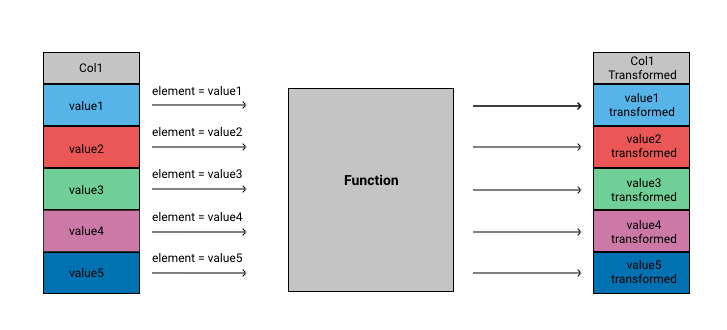

In [3]:
get_gif_n_image('https://s3.amazonaws.com/dq-content/345/Map_generic.svg')

We use the following syntax for both methods:

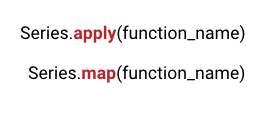

In [4]:
get_gif_n_image("https://s3.amazonaws.com/dq-content/345/Map_Apply_Syntax.svg")

Note that these methods both take a function as a parameter. Because we're using the function as a parameter, we pass it into the function without the parentheses. For example, if we were working with a function called `transform`, we'd pass it into the `apply()` method as follows:
```
def transform(val):
    return val
Series.apply(transform)
```

Let's compare the two methods in the next exercise.

*Instructions:*

-Use the `Series.map()` method to apply the `label` function to the `Economy` column in `happiness2015`. Assign the result to `economy_impact_map`.
-Use the `Series.apply()` method to apply the `label` function to the `Economy` column. Assign the result to `economy_impact_apply`.
-Use the following code to check if the methods produce the same result: `economy_impact_map.equals(economy_impact_apply)`. Assign the result to a variable named `equal`.

In [5]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply =happiness2015['Economy'].apply(label)

equal = economy_impact_map.equals(economy_impact_apply)

equal

True

In the last exercise, we applied a function to the `Economy` column using the `Series.map()` and `Series.apply()` methods and confirmed that both methods produce the same results.

Note that these methods don't modify the original series. If we want to work with the new series in the original dataframe, we must either assign the results back to the original column or create a new column. We recommend creating a new column, in case you need to reference the original values. Let's do that next:
```
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)
```

Below are the first couple rows of the `Economy` and `Economy Impact` columns.

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Economy</th>
<th>Economy Impact</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1.39651</td>
<td>High</td>
</tr>
<tr>
<th>1</th>
<td>1.30232</td>
<td>High</td>
</tr>
<tr>
<th>2</th>
<td>1.32548</td>
<td>High</td>
</tr>
<tr>
<th>3</th>
<td>1.45900</td>
<td>High</td>
</tr>
<tr>
<th>4</th>
<td>1.32629</td>
<td>High</td>
</tr>
</tbody>
</table>

To create the `Economy Impact` column, `map()` and `apply()` iterate through the `Economy` column and pass each value into the `label` function. The function evaluates which range the value belongs to and assigns the corresponding value to the element in the new column.

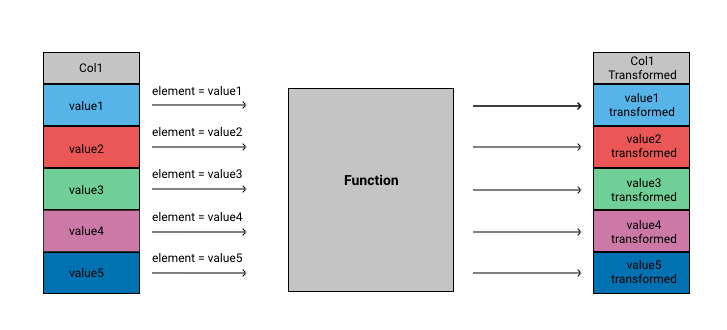

In [6]:
get_gif_n_image('https://s3.amazonaws.com/dq-content/345/Map.svg')

Since both `map` and `apply` can apply functions element-wise to a series, you may be wondering about the difference between them. Let's start by looking at a function with arguments.

In the label function, we arbitrarily split the values into 'High' and 'Low'. What if instead we allowed that number to be passed into the function as an argument?
```
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_map = happiness2015['Economy'].map(label, x = .8)
```
When we try to apply the function to the `Economy` column with the `map` method, we get an error:
```
TypeError: map() got an unexpected keyword argument 'x'
```

Let's confirm the behavior of the apply method next.

**Instructions:**

- Update `label` to take in another argument named `x`. If the `element` is greater than `x`, return 'High'. Otherwise, return 'Low'.
- Then, use the `apply` method to apply `label` to the `Economy` column and set the `x` argument to `0.8`. Save the result back to `economy_impact_apply`.

In [7]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
# Version 1:
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)

economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

We learned in the last screen that we can only use the `Series.apply()` method to apply a function with additional arguments element-wise - the `Series.map()` method will return an error.

So far, we've transformed just one column at a time. If we wanted to transform more than one column, we could use the `Series.map()` or `Series.apply()` method to transform them as follows:
```
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label)
happiness2015['Health Impact'] = happiness2015['Health'].apply(label)
happiness2015['Family Impact'] = happiness2015['Family'].apply(label)
```

However, it would be easier to just apply the same function to all of the factor columns (`Economy`, `Health`, `Family`, `Freedom`, `Generosity`, `Trust`) at once. Fortunately, however, pandas already has a method that can apply functions element-wise to multiple columns at once - the [DataFrame.applymap() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html).

We'll use the following syntax to work with the `df.applymap()` method:

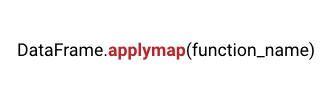

In [8]:
get_gif_n_image('https://s3.amazonaws.com/dq-content/345/Applymap_syntax.svg')

Just like with the `Series.map()` and `Series.apply()` methods, we need to pass the function name into the `df.applymap()` method without parentheses.

Let's practice using the df.applymap() method next.

**Instructions:**

We've already created a list named `factors` containing the column names for the six factors that contribute to the happiness score.

Use the `df.applymap()` method to apply the `label` function to the columns saved in `factors` in `happiness2015`. Assign the result to `factors_impact`.

In [9]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact = happiness2015[factors].applymap(label)
factors_impact

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low
...,...,...,...,...,...,...
153,Low,Low,Low,Low,Low,Low
154,Low,Low,Low,Low,Low,Low
155,Low,Low,Low,Low,Low,Low
156,Low,Low,Low,Low,Low,Low


In the last exercise, we learned that we can apply a function element-wise to multiple columns using the `df.applymap()` method.


```
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity'] 
factors_impact = happiness2015[factors].applymap(label)
```
Below are the first five rows of the results:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Economy</th>
<th>Family</th>
<th>Health</th>
<th>Freedom</th>
<th>Trust</th>
<th>Generosity</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>High</td>
<td>High</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
</tr>
<tr>
<th>1</th>
<td>High</td>
<td>High</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
</tr>
<tr>
<th>2</th>
<td>High</td>
<td>High</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
</tr>
<tr>
<th>3</th>
<td>High</td>
<td>High</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
</tr>
<tr>
<th>4</th>
<td>High</td>
<td>High</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
<td>Low</td>
</tr>
</tbody>
</table>

We can see from the results that, according to our definition, the `Economy` and `Family` columns had a high impact on the happiness scores of the first five countries.

Let's summarize what we learned so far:
<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
</tbody></table>

You can also use the `apply()` method on a dataframe, but the [`DataFrame.apply()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) has different capabilities. Instead of applying functions element-wise, the `df.apply()` method applies functions along an axis, either column-wise or row-wise. When we create a function to use with `df.apply()`, we set it up to accept a series, most commonly a column.

Let's use the `df.apply()` method to calculate the number of 'High' and 'Low' values in each column of the result from the last exercise, `factors_impact`. In order to do so, we'll apply the `pd.value_counts` function to all of the columns in the dataframe:
```
factors_impact.apply(pd.value_counts)
```
Below is the result:
<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Economy</th>
<th>Family</th>
<th>Health</th>
<th>Freedom</th>
<th>Trust</th>
<th>Generosity</th>
</tr>
</thead>
<tbody>
<tr>
<th>High</th>
<td>66</td>
<td>89</td>
<td>2</td>
<td>NaN</td>
<td>NaN</td>
<td>NaN</td>
</tr>
<tr>
<th>Low</th>
<td>92</td>
<td>69</td>
<td>156</td>
<td>158.0</td>
<td>158.0</td>
<td>158.0</td>
</tr>
</tbody>
</table>
Now, we can easily see that the `Family` and `Economy` columns contain the most 'High' values!

When we applied the [`pd.value_counts` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to `factors_impact`, it calculated the value counts for the first column, `Economy`, then the second column, `Family`, so on and so forth:

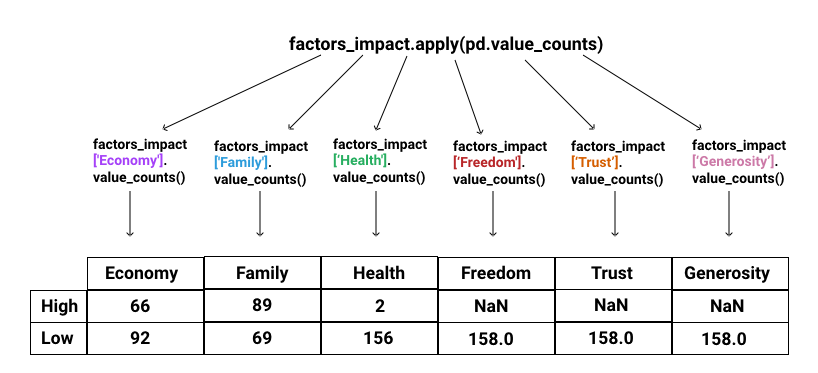

In [10]:
get_gif_n_image("https://s3.amazonaws.com/dq-content/345/Apply_counts.svg")

Notice that we used the `df.apply()` method to transform multiple columns. This is only possible because the `pd.value_counts` function operates on a series. If we tried to use the `df.apply()` method to apply a function that works element-wise to multiple columns, we'd get an error:
```
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015[factors].apply(label)
```
```
ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', u'occurred at index Economy')
```
Let's practice using the `df.apply()` method in the next exercise.

**Instructions:**

- Create a function that calculates the percentage of 'High' and 'Low' values in each column.
- Create a function named `v_counts` that accepts one parameter called `col`.
- Use the `Series.value_counts()` method to calculate the value counts for `col`. Assign the result to `num`.
- Use the `Series.size` attribute to calculate the number of rows in the column. Assign the result to `den`.
- Divide `num` by `den` and return the result.
- Use the `df.apply()` method to apply the `v_counts` function to all of the columns in `factors_impact`. Assign the result to `v_counts_pct`.

In [11]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num / den

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In the last exercise, we created a function that calculates the percentage of 'High' and 'Low' values in each column and applied it to `factors_impact`:

```
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den
v_counts_pct = factors_impact.apply(v_counts)
```

The result is a dataframe containing the percentage of 'High' and 'Low' values in each column:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Economy</th>
<th>Family</th>
<th>Health</th>
<th>Freedom</th>
<th>Trust</th>
<th>Generosity</th>
</tr>
</thead>
<tbody>
<tr>
<th>High</th>
<td>0.417722</td>
<td>0.563291</td>
<td>0.012658</td>
<td>NaN</td>
<td>NaN</td>
<td>NaN</td>
</tr>
<tr>
<th>Low</th>
<td>0.582278</td>
<td>0.436709</td>
<td>0.987342</td>
<td>1.0</td>
<td>1.0</td>
<td>1.0</td>
</tr>
</tbody>
</table>

In general, we should only use the `apply()` method when a vectorized function does not exist. Recall that pandas uses vectorization, the process of applying operations to whole series at once, to optimize performance. When we use the `apply()` method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the `apply()` method.

Next, we'll compare two different ways of performing an analysis task. First, we'll use the `df.apply()` method to transform the data. Then, we'll look at an alternate way to perform the same task with vectorized methods.

One thing you probably didn't notice about the factor columns is that the sum of the six factors and the `Dystopia Residual` column equals the happiness score:
```
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)
​
#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()
```

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Happiness Score</th>
<th>Factors Sum</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>7.587</td>
<td>7.58696</td>
</tr>
<tr>
<th>1</th>
<td>7.561</td>
<td>7.56092</td>
</tr>
<tr>
<th>2</th>
<td>7.527</td>
<td>7.52708</td>
</tr>
<tr>
<th>3</th>
<td>7.522</td>
<td>7.52222</td>
</tr>
<tr>
<th>4</th>
<td>7.427</td>
<td>7.42694</td>
</tr>
</tbody>
</table>

The values we calculated in the `Factors Sum` column are slightly different than the values in the `Happiness Score` column, but the differences are so minor that we can attribute them to rounding. Because the sum of the seven columns equal the happiness score, we can convert them to percentages and analyze them as proportions of the happiness score instead.

Let's use the `df.apply()` method to convert each of the values in the six factor columns and the `Dystopia Residual` column to percentages.

**Instructions:**

- Create a function that converts each of the six factor columns and the `Dystopia Residual` column to percentages.
    1. Create a function named `percentages` that accepts one parameter called `col`.
    2. Divide `col` by the `Happiness Score` column. Assign the result to `div`.
    3. Multiply `div` by 100 and return the result.
- Use the `df.apply()` method to apply the `percentages` function to all of the columns in `factors`. Assign the result to `factor_percentages`.

In [12]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col/happiness2015['Happiness Score']
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)

In [13]:
get_gif_n_image('https://s3.amazonaws.com/dq-content/345/Melt_Syntax.svg', only_picture_name=True)

Melt_Syntax.png


In the last exercise, we used the df.apply() method to convert the six factor columns and the Dystopia Residual column to percentages. Below are the first five rows of the result:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Economy</th>
<th>Family</th>
<th>Health</th>
<th>Freedom</th>
<th>Trust</th>
<th>Generosity</th>
<th>Dystopia Residual</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>18.406617</td>
<td>17.787136</td>
<td>12.408462</td>
<td>8.772506</td>
<td>5.532885</td>
<td>3.911691</td>
<td>33.180177</td>
</tr>
<tr>
<th>1</th>
<td>17.224177</td>
<td>18.545563</td>
<td>12.535908</td>
<td>8.315963</td>
<td>1.870784</td>
<td>5.770401</td>
<td>35.736146</td>
</tr>
<tr>
<th>2</th>
<td>17.609672</td>
<td>18.075993</td>
<td>11.620035</td>
<td>8.627342</td>
<td>6.424472</td>
<td>4.535539</td>
<td>33.108011</td>
</tr>
<tr>
<th>3</th>
<td>19.396437</td>
<td>17.694097</td>
<td>11.768280</td>
<td>8.903616</td>
<td>4.852832</td>
<td>4.613002</td>
<td>32.774661</td>
</tr>
<tr>
<th>4</th>
<td>17.857681</td>
<td>17.808132</td>
<td>12.193753</td>
<td>8.522553</td>
<td>4.437458</td>
<td>6.168170</td>
<td>33.011445</td>
</tr>
</tbody>
</table>

However, it would be easier to convert these numbers into percentages, plot the results, and perform other data analysis tasks if we first reshaped the dataframe so that one column holds the values for all six factors and the `Dystopia Residual` column. We can accomplish this with the [`pd.melt()` function.](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.melt.html)

To demonstrate this function, let's just work with a subset of `happiness2015` called `happy_two`.

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Country</th>
<th>Happiness Score</th>
<th>Economy</th>
<th>Family</th>
<th>Health</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>Switzerland</td>
<td>7.587</td>
<td>1.39651</td>
<td>1.34951</td>
<td>0.94143</td>
</tr>
<tr>
<th>1</th>
<td>Iceland</td>
<td>7.561</td>
<td>1.30232</td>
<td>1.40223</td>
<td>0.94784</td>
</tr>
</tbody>
</table>

Below, we use the `melt` function to reshape `happy_two` so that the values for `Economy`, `Family`, and `Health reside` in the same column:

```
pd.melt(happy_two, id_vars=['Country'], value_vars=['Economy', 'Family', 'Health'])
```

Below are the results:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Country</th>
<th>variable</th>
<th>value</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>Switzerland</td>
<td>Economy</td>
<td>1.39651</td>
</tr>
<tr>
<th>1</th>
<td>Iceland</td>
<td>Economy</td>
<td>1.30232</td>
</tr>
<tr>
<th>2</th>
<td>Switzerland</td>
<td>Family</td>
<td>1.34951</td>
</tr>
<tr>
<th>3</th>
<td>Iceland</td>
<td>Family</td>
<td>1.40223</td>
</tr>
<tr>
<th>4</th>
<td>Switzerland</td>
<td>Health</td>
<td>0.94143</td>
</tr>
<tr>
<th>5</th>
<td>Iceland</td>
<td>Health</td>
<td>0.94784</td>
</tr>
</tbody>
</table>

Now, we can use vectorized operations to transform the value column at once!

Here's a summary of the syntax we used to work with the melt function:


![alt text](Melt_Syntax.png "Melt_Syntax.png")

Let's reshape all of `happiness2015` with the `melt` function next.

**Instructions**

Use the `melt` function to reshape `happiness2015`. The columns listed in `main_cols` should stay the same. The columns listed in `factors` should be transformed into rows. Assign the result to a variable called `melt`.
- Convert the `value` column to a percentage.
    1. Divide the `value` column by the `Happiness Score` column and multiply the result by `100`.
    2. Use the [`round()` function](https://docs.python.org/3/library/functions.html#round) to round the result to 2 decimal places.
    3. Assign the result to a new column called `Percentage`.

In [14]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)

melt['Percentage'] = round(melt['value']/ melt['Happiness Score'] * 100, 2)

melt


,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
...,...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10


In [15]:
get_gif_n_image('https://s3.amazonaws.com/dq-content/345/Year_Happiness_Scores.png', only_picture_name=True)

Year_Happiness_Scores.png


In the last exercise, we used the `melt` function to reshape our data so that we could use vectorized operations to convert the `value` column into percentages.
```
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = melt['value']/melt['Happiness Score'] * 100
```
Below is the result:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Country</th>
<th>Region</th>
<th>Happiness Rank</th>
<th>Happiness Score</th>
<th>variable</th>
<th>value</th>
<th>Percentage</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>Switzerland</td>
<td>Western Europe</td>
<td>1</td>
<td>7.587</td>
<td>Economy</td>
<td>1.39651</td>
<td>18.406617</td>
</tr>
<tr>
<th>1</th>
<td>Iceland</td>
<td>Western Europe</td>
<td>2</td>
<td>7.561</td>
<td>Economy</td>
<td>1.30232</td>
<td>17.224177</td>
</tr>
<tr>
<th>2</th>
<td>Denmark</td>
<td>Western Europe</td>
<td>3</td>
<td>7.527</td>
<td>Economy</td>
<td>1.32548</td>
<td>17.609672</td>
</tr>
<tr>
<th>3</th>
<td>Norway</td>
<td>Western Europe</td>
<td>4</td>
<td>7.522</td>
<td>Economy</td>
<td>1.45900</td>
<td>19.396437</td>
</tr>
<tr>
<th>4</th>
<td>Canada</td>
<td>North America</td>
<td>5</td>
<td>7.427</td>
<td>Economy</td>
<td>1.32629</td>
<td>17.857681</td>
</tr>
</tbody>
</table>

The `melt` function moved the values in the seven columns - `Economy`, `Health`, `Family`, `Freedom`, `Generosity`, `Trust`, and `Dystopia Residual` - to the same column, which meant we could transform them all at once.

You may have also noticed that now the data is in a format that makes it easier to aggregate. We refer to data in this format as tidy data. If you're interested in learning more about the tidy format, you can read about it [here](https://www.jstatsoft.org/article/view/v059i10).

Next, let's group the data by the `variable` column, find the mean value of each variable (or factor), and plot the results to see how much each factor contributes to the happiness score on average. In the last mission, we combined the 2015, 2016, and 2017 reports, aggregated the data by the `Year` column using the `df.pivot_table()` method, and then plotted the results as follows:

```
#Concatenate happiness2015, happiness2016, and happiness2017.
combined = pd.concat([happiness2015, happiness2016, happiness2017])

#Create a pivot table listing the mean happiness score for each year. Since the default aggregation function is the mean, we excluded the `aggfunc` argument.
pivot_table_combined = combined.pivot_table(index = 'Year', values = 'Happiness Score')

#Plot the pivot table.
pivot_table_combined.plot(kind ='barh', title='Mean Happiness Scores by Year', xlim = (0,10))
```

Let's repeat the same task, but this time, we'll group the data by the `variable` column instead of the `Year` column and plot the results using a pie chart.

**Instructions**

- Use the `df.pivot_table()` method to create a pivot table from the `melt` dataframe. Set the `variable` column as the `index` and the `value` column as the `values`. Assign the result to `pv_melt`.
- Use the `df.plot()` method to create a pie chart of the results. Set the `kind` parameter to `'pie'`, the `y` parameter to `'value'`, and the `legend` parameter to `False`, so we can better see the results.
- If we disregard `Dystopia Residual`, which two factors, on average, contribute the most to the happiness score?


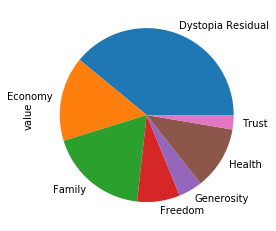

In [16]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

pv_melt = melt.pivot_table(index= 'variable', values = 'value')

pv_melt.plot(kind='pie', y = 'value', legend=False)
plt.show()

In this mission, we learned how to transform data using the `Series.map()`, `Series.apply()`, `DataFrame.apply()`, and `DataFrame.applymap()` methods along with the `pd.melt()` function. Below is a summary chart of the differences between `the map()`, `apply()`, and `applymap()` methods:
<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Dataframe</td>
<td>No, applies functions along an axis</td>
</tr>
</tbody></table>


As you explore pandas, you'll also find that pandas has a method to "un-melt" the data, or transform rows into columns. This method is called the [`df.pivot()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html), not to be confused with the [`df.pivot_table()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html) used to aggregate data. Although we couldn't cover the ['df.pivot()' method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) explicitly in this mission, we encourage you to explore it on your own.

In the next mission, we'll learn how to manipulate strings in pandas as we continue building on what we've learned so far.

## Working with df.pivot() method:

In the example below, we use the first 10 rows from the `melt` object and reshape it into a new form.

In [17]:
melt[:10]

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
5,Finland,Western Europe,6,7.406,Economy,1.29025,17.42
6,Netherlands,Western Europe,7,7.378,Economy,1.32944,18.02
7,Sweden,Western Europe,8,7.364,Economy,1.33171,18.08
8,New Zealand,Australia and New Zealand,9,7.286,Economy,1.25018,17.16
9,Australia,Australia and New Zealand,10,7.284,Economy,1.33358,18.31


Let's assume that we want to know the value of the `economy` happiness factor for each `country` in the first 10 rows of `melt:

In [18]:
new_melt = melt[:10]

economy_10 = new_melt.pivot(index='value', columns='variable', values='Country')

economy_10

variable,Economy
value,
1.25018,New Zealand
1.29025,Finland
1.30232,Iceland
1.32548,Denmark
1.32629,Canada
1.32944,Netherlands
1.33171,Sweden
1.33358,Australia
1.39651,Switzerland


-------------------
### Conclusion:
As we can see, the economy is an important factor for Norway the most. Also, Switzerland is very high in rank. On the other end: New Zealand seems to not see the economy as an important happiness factor. Maybe this data points out which country is more or less materialistic, and/or where it focuses the idea of happiness.